In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
y_train

array([ 1.,  0.,  0., ...,  0.,  1.,  0.], dtype=float32)

In [12]:
from keras import models
from keras import layers

In [25]:
model = models.Sequential()

In [26]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
from keras import losses, metrics, optimizers

In [28]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [29]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [30]:
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.5222 - binary_accuracy: 0.7838 - val_loss: 0.3925 - val_binary_accuracy: 0.8682
Epoch 2/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.3150 - binary_accuracy: 0.8976 - val_loss: 0.3158 - val_binary_accuracy: 0.8804
Epoch 3/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.2295 - binary_accuracy: 0.9251 - val_loss: 0.2789 - val_binary_accuracy: 0.8920
Epoch 4/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1806 - binary_accuracy: 0.9395 - val_loss: 0.2893 - val_binary_accuracy: 0.8822
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1436 - binary_accuracy: 0.9536 - val_loss: 0.2990 - val_binary_accuracy: 0.8840
Epoch 6/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.1182 - binary_accuracy: 0.9628 - val_loss: 0.2914 - val_bi

In [31]:
history_dict = history.history

In [32]:
history_dict.keys()

dict_keys(['binary_accuracy', 'val_binary_accuracy', 'val_loss', 'loss'])

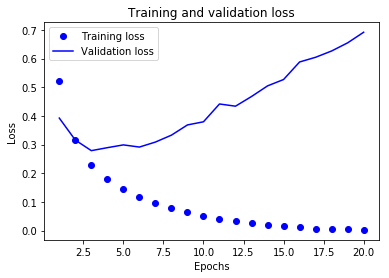

In [33]:
import matplotlib.pyplot as plt

history_dict = history.history
acc = history.history['binary_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

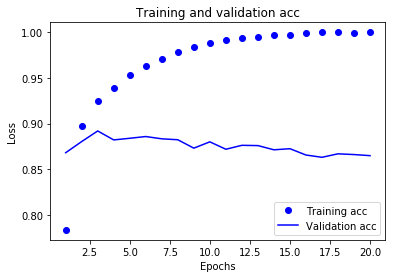

In [35]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [36]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 129us/step


In [37]:
results

[0.77780016607284541, 0.84811999999999999]

In [38]:
model.predict(x_test)

array([[ 0.01042097],
       [ 1.        ],
       [ 0.94906777],
       ..., 
       [ 0.00120166],
       [ 0.0088521 ],
       [ 0.74098474]], dtype=float32)